# Titanic - Learning from disaster

## The Callenge

The sinking of the Titanic is one of the most infamous shipwrecks in history.

On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone onboard, resulting in the death of 1502 out of 2224 passengers and crew.

While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others.

In this challenge, we ask you to build a predictive model that answers the question: “what sorts of people were more likely to survive?” using passenger data (ie name, age, gender, socio-economic class, etc). 

## What Data Will I Use in This Competition?

In this competition, you’ll gain access to two similar datasets that include passenger information like name, age, gender, socio-economic class, etc. One dataset is titled `train.csv` and the other is titled `test.csv`.

Train.csv will contain the details of a subset of the passengers on board (891 to be exact) and importantly, will reveal whether they survived or not, also known as the “ground truth”.

The `test.csv` dataset contains similar information but does not disclose the “ground truth” for each passenger. It’s your job to predict these outcomes.

Using the patterns you find in the train.csv data, predict whether the other 418 passengers on board (found in test.csv) survived.

Check out the [“Data” tab](https://www.kaggle.com/c/titanic/data) to explore the datasets even further. Once you feel you’ve created a competitive model, submit it to Kaggle to see where your model stands on our leaderboard against other Kagglers.

## Imports

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Show all columns
pd.set_option('display.expand_frame_repr', False)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Loading the data

I found no way of reading the data from kaggle directly, so I stored them in my GitHub-Repo.

In [0]:
train_data = pd.read_csv("https://raw.githubusercontent.com/faaabi93/ml/master/titanic/train.csv")
test_data = pd.read_csv("https://raw.githubusercontent.com/faaabi93/ml/master/titanic/test.csv")

In [3]:
print(train_data.head(10))
print(train_data.info())

   PassengerId  Survived  Pclass                                               Name     Sex   Age  SibSp  Parch            Ticket     Fare Cabin Embarked
0            1         0       3                            Braund, Mr. Owen Harris    male  22.0      1      0         A/5 21171   7.2500   NaN        S
1            2         1       1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1      0          PC 17599  71.2833   C85        C
2            3         1       3                             Heikkinen, Miss. Laina  female  26.0      0      0  STON/O2. 3101282   7.9250   NaN        S
3            4         1       1       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1      0            113803  53.1000  C123        S
4            5         0       3                           Allen, Mr. William Henry    male  35.0      0      0            373450   8.0500   NaN        S
5            6         0       3                                   Moran, Mr

In [4]:
print(test_data.head(10))
print(test_data.info())

   PassengerId  Pclass                                          Name     Sex   Age  SibSp  Parch     Ticket     Fare Cabin Embarked
0          892       3                              Kelly, Mr. James    male  34.5      0      0     330911   7.8292   NaN        Q
1          893       3              Wilkes, Mrs. James (Ellen Needs)  female  47.0      1      0     363272   7.0000   NaN        S
2          894       2                     Myles, Mr. Thomas Francis    male  62.0      0      0     240276   9.6875   NaN        Q
3          895       3                              Wirz, Mr. Albert    male  27.0      0      0     315154   8.6625   NaN        S
4          896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female  22.0      1      1    3101298  12.2875   NaN        S
5          897       3                    Svensson, Mr. Johan Cervin    male  14.0      0      0       7538   9.2250   NaN        S
6          898       3                          Connolly, Miss. Kate  female

##Data Cleaning


Reviewing the data to check if any aberrant or non-acceptable data inputs appear in the data. An Age of 800 should be corrected.

As we can see in the `df.info()` above, the Age needs to be corrected in both DataFrames.  
Also there seems to be a Fare value missing in the `test_data`.  
  
There also seems to be data, which we can straight out delete from our DataFrames.

In [5]:
data = [train_data, test_data]
columns_to_drop = ["PassengerId", "Ticket", "Cabin", "SibSp", "Parch", "Embarked"]

for d in data:
  d["Age"].fillna(d["Age"].median(), inplace=True)
  d["Fare"].fillna(d["Fare"].median(), inplace=True)
  d["Gender"] = [1 if (i == "male") else 0 for i in d["Sex"]]
  d.drop(columns_to_drop, inplace=True, axis=1)


for d in data:
  print(d.head(5))
  print(d.info())

   Survived  Pclass                                               Name     Sex   Age     Fare  Gender
0         0       3                            Braund, Mr. Owen Harris    male  22.0   7.2500       1
1         1       1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0  71.2833       0
2         1       3                             Heikkinen, Miss. Laina  female  26.0   7.9250       0
3         1       1       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0  53.1000       0
4         0       3                           Allen, Mr. William Henry    male  35.0   8.0500       1
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       891 non-null    float64
 5   Fare  

## Visualizing the data

Text(0.5, 0, 'Class')

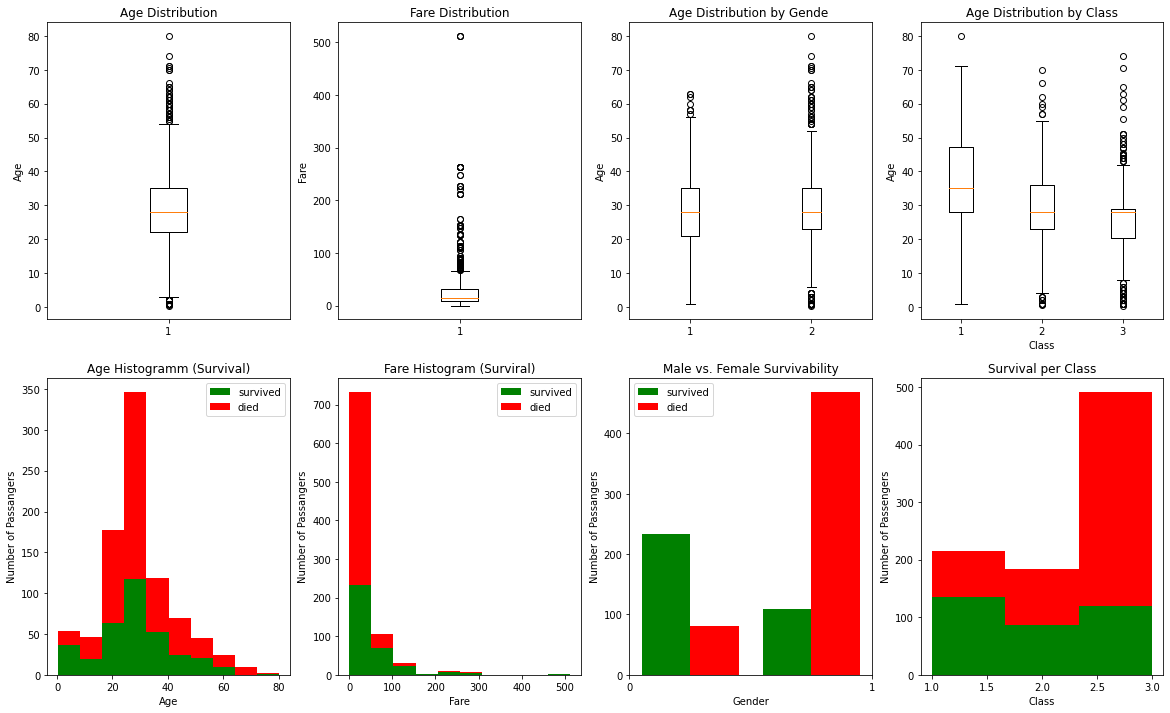

In [37]:
plt.figure(figsize=[20,12])

plt.subplot(241)
plt.boxplot(x = train_data["Age"])
plt.title("Age Distribution")
plt.ylabel("Age")

plt.subplot(242)
plt.boxplot(x = train_data["Fare"])
plt.title("Fare Distribution")
plt.ylabel("Fare")

plt.subplot(243)
# 1 = male; 0 = female
plt.boxplot(x = [train_data[train_data["Gender"] == 0]["Age"], train_data[train_data["Gender"] == 1]["Age"]])
plt.title("Age Distribution by Gende ")
plt.ylabel("Age")

plt.subplot(244)
# 1 = male; 0 = female
plt.boxplot(x = [train_data[train_data["Pclass"] == 1]["Age"], train_data[train_data["Pclass"] == 2]["Age"], train_data[train_data["Pclass"] == 3]["Age"]])
plt.title("Age Distribution by Class")
plt.ylabel("Age")
plt.xlabel("Class")

plt.subplot(245)
plt.hist(x = [train_data[train_data["Survived"] == 1]["Age"], train_data[train_data["Survived"] == 0]["Age"]], stacked=True, color=["green", "red"], label=["survived", "died"])
plt.title("Age Histogramm (Survival)")
plt.ylabel("Number of Passangers")
plt.xlabel("Age")
plt.legend()

plt.subplot(246)
plt.hist(x = [train_data[train_data["Survived"] == 1]["Fare"], train_data[train_data["Survived"] == 0]["Fare"]], stacked=True, color=["green", "red"], label=["survived", "died"])
plt.title("Fare Histogram (Surviral)")
plt.ylabel("Number of Passangers")
plt.xlabel("Fare")
plt.legend()

plt.subplot(247)
plt.hist(x = [train_data[train_data["Survived"] == 1]["Gender"], train_data[train_data["Survived"] == 0]["Gender"]], bins=2, color = ["Green", "Red"], label=["survived", "died"])
plt.xticks([0,1])
plt.legend()
plt.title("Male vs. Female Survivability")
plt.xlabel("Gender")
plt.ylabel("Number of Passangers")

plt.subplot(248)
# 1 = male; 0 = female
plt.hist(x = [ train_data[train_data["Survived"] == 1]["Pclass"], train_data[train_data["Survived"] == 0]["Pclass"]], stacked=True, bins=3, color=["Green", "Red"], label=["survived", "died"], align="mid")
plt.title("Survival per Class")
plt.ylabel("Number of Passengers")
plt.xlabel("Class")

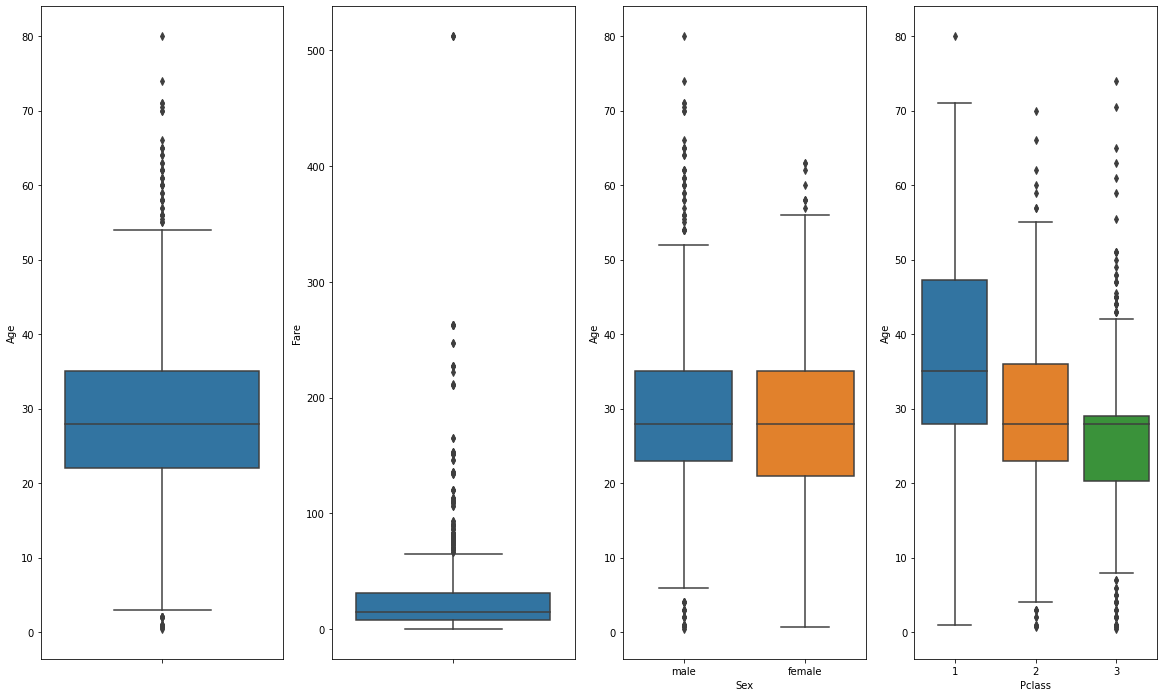

In [77]:
f, axes = plt.subplots(1, 4)
f.set_size_inches(20, 12)

sns.boxplot(x="Age", data=train_data, ax=axes[0], orient="v")
sns.boxplot(x="Fare", data=train_data, ax=axes[1], orient="v")
sns.boxplot(x="Sex", y="Age", data=train_data, ax=axes[2])
sns.boxplot(x="Pclass", y="Age", data=train_data, ax=axes[3])

AttributeError: ignored

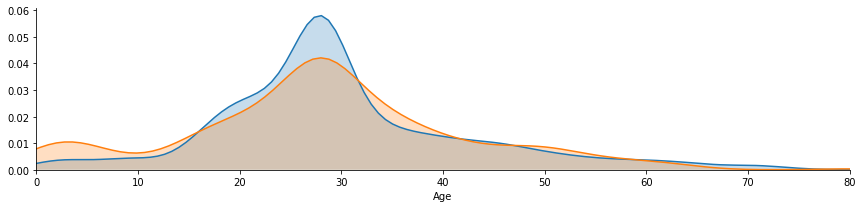

In [80]:
a = sns.FacetGrid( train_data, hue = 'Survived', aspect=4 )
a.map(sns.kdeplot, 'Age', shade= True )
a.set(xlim=(0 , train_data['Age'].max()))
a.add_legend()

## Train Test Split

The Survived-Column is our Target. The other columns are our features.
We need to split this DF in features (X) and targets (y).

In [7]:
train_data.head(10)

,Survived,Pclass,Name,Sex,Age,Fare,Gender
0,0,3,"Braund, Mr. Owen Harris",male,22.0,7.2500,1
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,71.2833,0
2,1,3,"Heikkinen, Miss. Laina",female,26.0,7.9250,0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,53.1000,0
4,0,3,"Allen, Mr. William Henry",male,35.0,8.0500,1
5,0,3,"Moran, Mr. James",male,28.0,8.4583,1
6,0,1,"McCarthy, Mr. Timothy J",male,54.0,51.8625,1
7,0,3,"Palsson, Master. Gosta Leonard",male,2.0,21.0750,1
8,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,11.1333,0
9,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,30.0708,0


In [0]:
features = train_data[["Pclass", "Age", "Gender"]]
target = train_data["Survived"]

Moreover we need to further split the features and targets in data for training and testing our model. This is done with the `train_test_split`.

In [0]:
X_train, X_test, y_train, y_test = train_test_split(features, target)

Since `skleanr`'s Logistic Regression implementation uses Regularization, we need to scale our feature data with the `Standard Scaler`.  
This will be fitted with our X_train data and the X_test data will be scaled the same way afterwads.

In [0]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Creating a Logisitc Regression Model

After the data is scaled we create our Logistic Regression Model and fit it with the training features (`X_train`) and training labels (`y_train`).

In [11]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [12]:
model.score(X_train, y_train)

0.7949101796407185

In [13]:
model.score(X_test, y_test)

0.7937219730941704

In [14]:
model.coef_

array([[-0.96330991, -0.37558172, -1.24817869]])

In [15]:
model.predict_proba(X_test)

array([[0.92360253, 0.07639747],
       [0.91733516, 0.08266484],
       [0.74828411, 0.25171589],
       [0.44438506, 0.55561494],
       [0.31737577, 0.68262423],
       [0.83696187, 0.16303813],
       [0.91514412, 0.08485588],
       [0.77421004, 0.22578996],
       [0.89564234, 0.10435766],
       [0.89018328, 0.10981672],
       [0.72617   , 0.27383   ],
       [0.72045615, 0.27954385],
       [0.89294343, 0.10705657],
       [0.9194746 , 0.0805254 ],
       [0.87810122, 0.12189878],
       [0.74213438, 0.25786562],
       [0.78403555, 0.21596445],
       [0.90086025, 0.09913975],
       [0.13158294, 0.86841706],
       [0.86906942, 0.13093058],
       [0.87810122, 0.12189878],
       [0.91514412, 0.08485588],
       [0.09711934, 0.90288066],
       [0.09711934, 0.90288066],
       [0.91514412, 0.08485588],
       [0.91514412, 0.08485588],
       [0.12519404, 0.87480596],
       [0.85551782, 0.14448218],
       [0.05428067, 0.94571933],
       [0.11075474, 0.88924526],
       [0.